# Practical Session 1 Unsupervised learning
# _________________________________________________________________

## Necessary Imports

In [30]:
#necessary imports
import numpy as np
import pylab as pl
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap
import sklearn
import seaborn as sns 
from matplotlib.lines import Line2D
from sklearn.decomposition import PCA


## Temperature Dataset

### 1 Loading Data

#### Question 1: Load Data

In [63]:
temp_dataset=np.load('temper.npz')
print(type(temp_dataset))

<class 'numpy.lib.npyio.NpzFile'>


In [64]:
#store values
data=temp_dataset.get('data')
cities=temp_dataset.get('villes')
varname=temp_dataset.get('varname')
print('data shape: ',data.shape)
print('cities shape: ',cities.shape)
print('varname shape: ',varname.shape)

x1=[]
for i in range(0,len(data)):
    inter=[]
    x1.append(data[i][:-2].tolist())
x1=np.array(x1)
print('x1 shape: ',x1.shape)


data shape:  (15, 14)
cities shape:  (15,)
varname shape:  (14,)
x1 shape:  (15, 12)


#### Question 2: Plot the mean values 

##### plot avg. temperature for each month 

In [65]:
#check mean of the data per month
mean=np.mean(x1,axis=0)
print(mean.shape)

(12,)


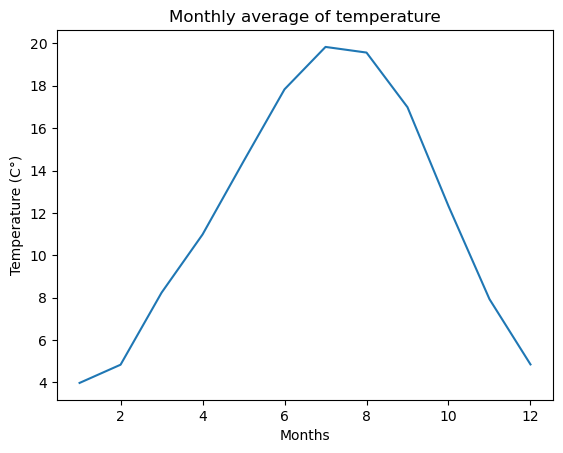

In [66]:
x=np.arange(1,13)
y=mean


# plot
fig, ax = plt.subplots()
ax.plot(x, y)
plt.title('Monthly average of temperature')
plt.xlabel('Months')
plt.ylabel('Temperature (C°)')

plt.show()
#

*Interpretation*: we can observe a certain guassian distribution for out averages 
the values seems to be logical with higher temeperature in summer and lower values for winter

#### Question 3 (Bonus)

##### plot for the evolution of temeprature per month and per city

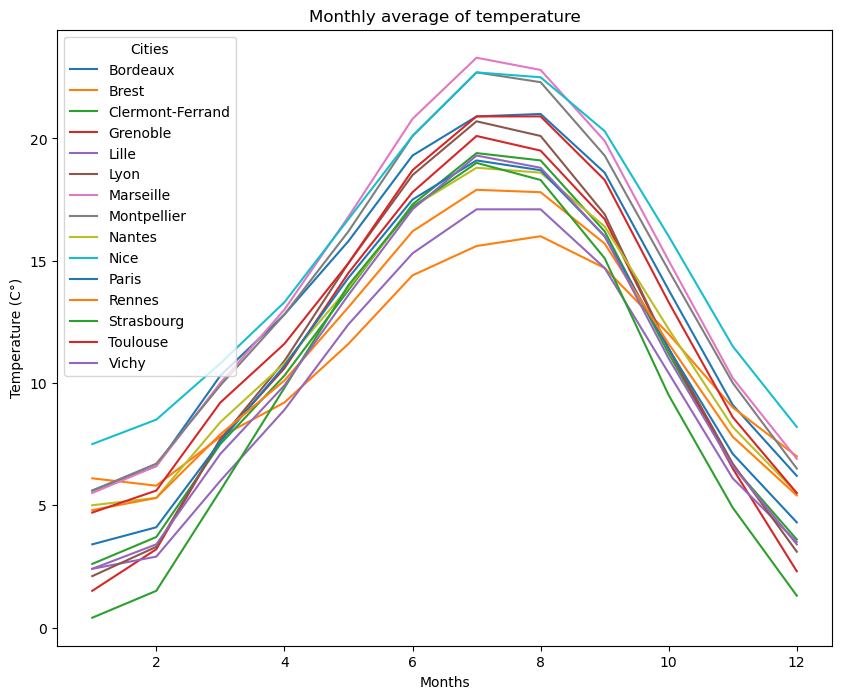

In [67]:
#average per city and per month
x=np.arange(1,13)
y=x1



# plot
fig, ax = plt.subplots(figsize=(10, 8))

# Plot each point separately with its own label for the legend
for i in range(0,len(cities)):
    ax.plot(x,y[i],label=cities[i])
# for el in y:
#     ax.plot(x, el[1:],label=el[0])
ax.legend(title='Cities',loc='upper left')

plt.title('Monthly average of temperature')
plt.xlabel('Months')
plt.ylabel('Temperature (C°)')
plt.show()

##### plot of the cities and mean yearly temeperature 

In [68]:
#check the mean with respect to the cities 
mean_per_city=[]
for el in x1:
    mean_per_city.append(np.mean(el[1:]))  

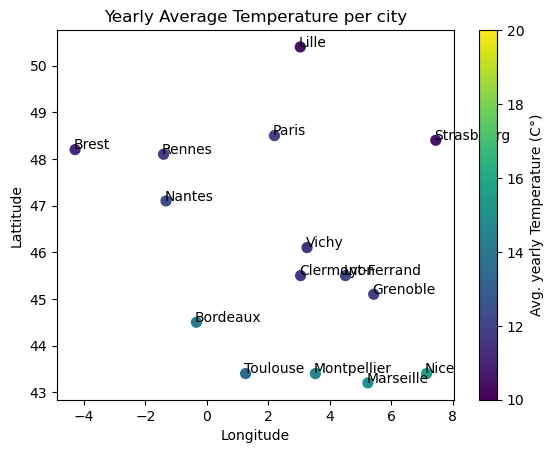

In [69]:
x_months=np.arange(1,13)
y=np.array(mean_per_city)
geo=data[:,-2:] #get the geo location


# Create figure and axes
fig, ax = plt.subplots()

# Scatter plot with color
scatter = ax.scatter(geo[:,1], geo[:,0], c=y, vmin=10, vmax=20, cmap='viridis', s=50)

# Add colorbar
fig.colorbar(scatter, ax=ax, label='Avg. yearly Temperature (C°)')

# Add point labels
for i, label in enumerate(cities):
    ax.text(geo[i][1]-0.05, geo[i][0]+0.01, label, fontsize=10)

# Add labels and title
ax.set_title('Yearly Average Temperature per city')
ax.set_xlabel('Longitude')
ax.set_ylabel('Lattitude')

plt.show()



### 2 Clustering

#### 2.1 For both Dataset

##### Question 1: Perfrom K-means with K=3

In [70]:
#Intiating the model 
n_clusters=3
kmeans=KMeans(n_clusters=n_clusters,random_state=42,n_init="auto")

#fit the kmeans k=3
kmeans.fit(x1)

#store the centroids and labels for plotting
centroids=kmeans.cluster_centers_
labels=kmeans.labels_

##### Question 2: Plot the centroids with K=3

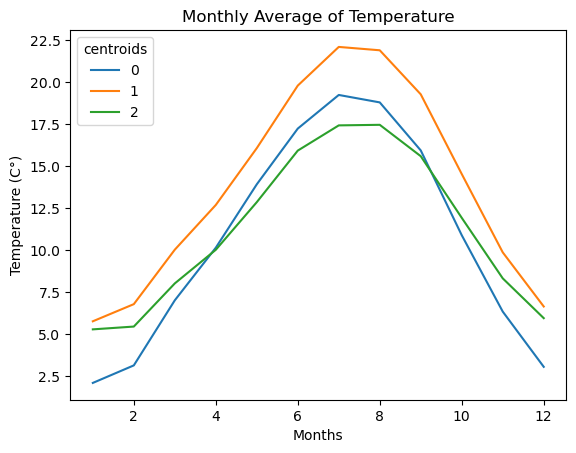

In [71]:
x_months=np.arange(1,13)
cleaned_centroids=centroids #take out the longitude and lattitude

# Create figure and axes
fig, ax = plt.subplots()

# # Scatter plot with color
# scatter = ax.scatter(geo[:,1], geo[:,0], c=y,cmap=cmap, s=50)
for i,el in enumerate(cleaned_centroids):
    ax.plot(x_months,el,label=i)


# Add labels and title
ax.legend(title='centroids',loc='upper left')
ax.set_title('Monthly Average of Temperature')
ax.set_xlabel('Months')
ax.set_ylabel('Temperature (C°)')

plt.show()



*Interpretation*: with K=3
- 0: cities very cold in winter and have an average summer (northern cities and probably regions in middle because of the inlfuence of the alpes specially in winter)
- 1: cities hotter on average in winter and as well in summer (probably southern cites)
- 2: cities with an average summer temperatures but also a not very cold winter (it's the class with the slowest variance a big chance it's the bretanie region) 

##### Question 3: Perfrom K-means with other K and plot the centroids

In [72]:
#Intiating the model k=4
n_clusters=4
kmeans=KMeans(n_clusters=n_clusters,random_state=42,n_init="auto")

#fit the kmeans 
kmeans.fit(x1)

#store the centroids and labels for plotting
centroids=kmeans.cluster_centers_
labels=kmeans.labels_

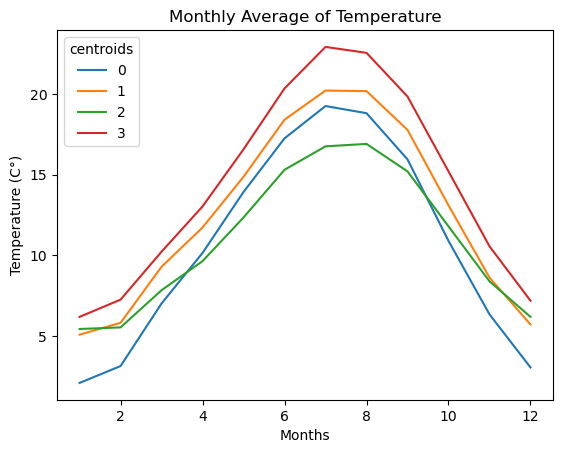

In [73]:
x_months=np.arange(1,13)

cleaned_centroids=centroids #take out the longitude and lattitude

# Create figure and axes
fig, ax = plt.subplots()

# # Scatter plot with color
# scatter = ax.scatter(geo[:,1], geo[:,0], c=y,cmap=cmap, s=50)
for i,el in enumerate(cleaned_centroids):
    ax.plot(x_months,el,label=i)


# Add labels and title
ax.legend(title='centroids',loc='upper left')
ax.set_title('Monthly Average of Temperature')
ax.set_xlabel('Months')
ax.set_ylabel('Temperature (C°)')

plt.show()



*Interpretation*: with k=4
- 0: cities very cold in winter and have an average summer
- 1: cities hotter on average in winter and as well in summer (probably southern cites)
- 2: cities with an average summer temperatures but also a not very cold winter (it's the class with the slowest variance a big chance it's the bretanie region)
- 3: cities with hotter sumer and hotter winter probably cities that are in the south but not on facing the sea hence the great heat in summer 

#### 2.2 Plot clusters per geograhpical positions

In [74]:
#Intiating the model 
n_clusters=3
kmeans=KMeans(n_clusters=n_clusters,random_state=42,n_init="auto")

#fit the kmeans 
kmeans.fit(x1)

#store the centroids and labels for plotting
centroids=kmeans.cluster_centers_
labels=kmeans.labels_

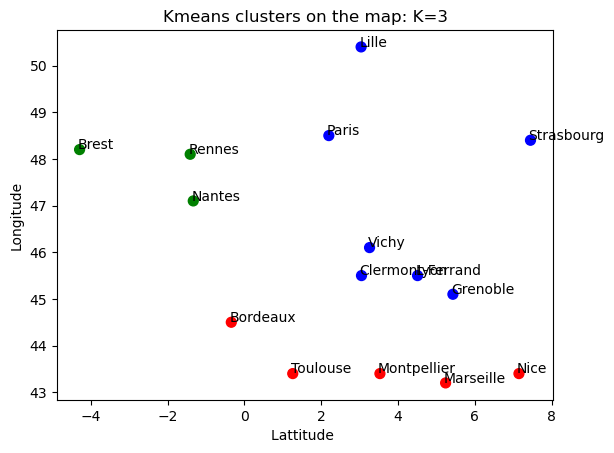

In [75]:
x_months=np.arange(1,13)
y=labels
geo=data[:,-2:] #get the geo location
colors=['blue','red','green']
cmap=ListedColormap(colors)

geo_centroids=centroids

# Create figure and axes
fig, ax = plt.subplots()

# Scatter plot with color
scatter = ax.scatter(geo[:,1], geo[:,0], c=y,cmap=cmap, s=50)

# Add point labels
for i, label in enumerate(cities):
    ax.text(geo[i][1]-0.05, geo[i][0]+0.01, label, fontsize=10)

# Add labels and title
ax.set_title('Kmeans clusters on the map: K=3')
ax.set_xlabel('Lattitude ')
ax.set_ylabel('Longitude')

plt.show()

*Interpretation*: clearly geography has an impact on the K-means labeling. But isn't temperture strongly linked to geography (mountains, sea...).
Hence even if the geographical data wasn't included in the K-means we can observe it's influence.

Try with k=4

In [76]:
#Intiating the model 
n_clusters=4
kmeans=KMeans(n_clusters=n_clusters,random_state=42,n_init="auto")

#fit the kmeans 
kmeans.fit(x1)

#store the centroids and labels for plotting
centroids=kmeans.cluster_centers_
labels=kmeans.labels_

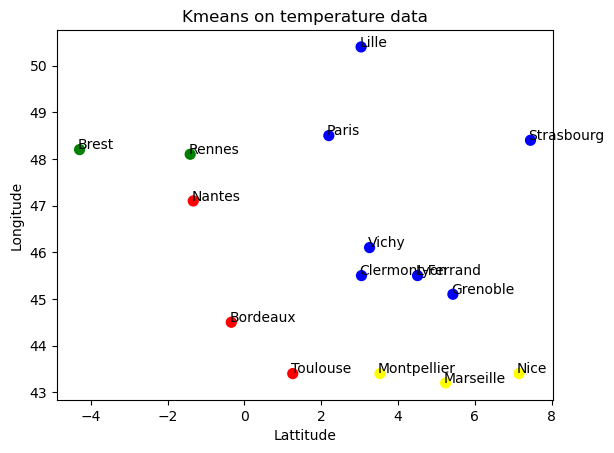

In [77]:
#fit the kmeans k=4
from matplotlib.colors import ListedColormap

 
kmeans=KMeans(n_clusters=4,random_state=42,n_init="auto")
kmeans.fit(x1)
centroids=kmeans.cluster_centers_
labels=kmeans.labels_


y=labels
geo=data[:,-2:] #get the geo location
colors=['blue','red','green','yellow']
cmap=ListedColormap(colors)

geo_centroids=centroids[:,-2:]

# Create figure and axes
fig, ax = plt.subplots()

# Scatter plot with color
scatter = ax.scatter(geo[:,1], geo[:,0], c=y,cmap=cmap, s=50)

# for i in range(0,len(centroids)):
#     ax.scatter(geo_centroids[i,1],geo_centroids[i,0],color=colors[i],edgecolors='black',linewidth=1.5,s=100)


# Add point labels
for i, label in enumerate(cities):
    ax.text(geo[i][1]-0.05, geo[i][0]+0.01, label, fontsize=10)


# for i in range(0,len(centroids)):
#     ax.text(geo_centroids[i,1]-0.05, geo_centroids[i,0]+0.01, i, fontsize=10)


# Add labels and title
ax.set_title('Kmeans on temperature data')
ax.set_xlabel('Lattitude')
ax.set_ylabel('Longitude')

plt.show()



*Interpreation*: hen we observe the k=4 we can realize that the geographical impact has reduces (in termes of lattitude/longitude).
- Cities who are very cold in the winter yet slightly hot have their own cluster (Paris, Lyon)
- Cities colder all year around have their cluster (Brest, Rennes)
- Cities that are hotter but a summer that is slightly fresh (the sea acess) hence Nice, Marseille get their clusters
- Cities with hot summers and the winter isn't very intense (Toulouse and Bordeaux).
Here clearly with an increase of clusters we demonstrated that there's a hidden impact that made a seperation with existent clusters in the case of 
K=3. The example, I keep is the seperation between Bordeaux and Toulousue from the southern cities. 

### 3 Density Estimation

##### Question 1: Estimate GMM density (components=2)

In [78]:
temp_GMM=sklearn.mixture.GaussianMixture(n_components=2,covariance_type='diag',random_state=42)
temp_GMM.fit(x1)
gaussian_centers=temp_GMM.means_

##### Question 2: Plot centers of Guassian distributions (components=2)

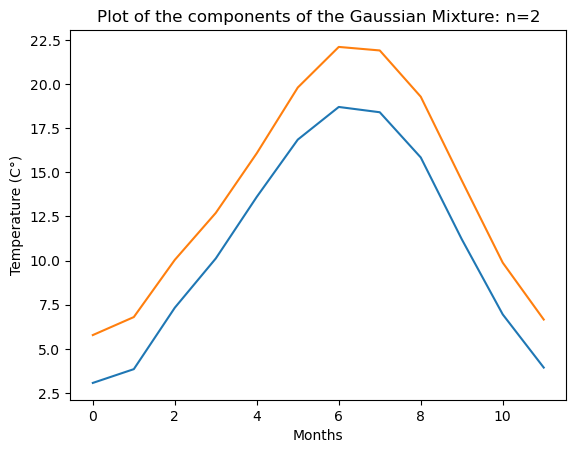

In [79]:
# Create figure and axes
fig, ax = plt.subplots()

# # Scatter plot with color
# scatter = ax.scatter(geo[:,1], geo[:,0], c=y,cmap=cmap, s=50)
for mean in gaussian_centers:
    ax.plot(mean)


# Add labels and title
ax.set_title('Plot of the components of the Gaussian Mixture: n=2')
ax.set_xlabel('Months')
ax.set_ylabel('Temperature (C°)')

plt.show()

#by having two componnents the most obvious way to interpret this with a guassian for north (lower temp) and south gaussian (higher temp) 

*Interpretation*: Since we imosed 2 components the most obvious observation is having two gaussians one for northern cities and one for southern cities

##### Question 3: Repeat with different component number 

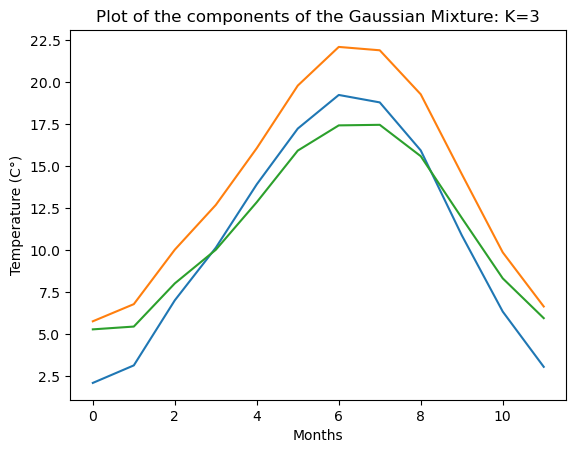

In [80]:
#try for k=3
temp_GMM=sklearn.mixture.GaussianMixture(n_components=3,covariance_type='diag',random_state=42)
temp_GMM.fit(x1)
gaussian_centers=temp_GMM.means_



# Create figure and axes
fig, ax = plt.subplots()

# # Scatter plot with color
# scatter = ax.scatter(geo[:,1], geo[:,0], c=y,cmap=cmap, s=50)
for mean in gaussian_centers:
    ax.plot(mean)


# Add labels and title
ax.set_title('Plot of the components of the Gaussian Mixture: K=3')
ax.set_xlabel('Months')
ax.set_ylabel('Temperature (C°)')

plt.show()

*Interpreation*: 
- For me a good value could 3 components as for the cities we accounted for we have:
    - North cities with no access on sea (so low winter temperature but high temperature in summer as well)
    - south cities (higher temp in winter with a high temp in summer)
    - coastal cities that keep a low variance (low temp for a winter and a low temp for a summer)

Observe Covariances

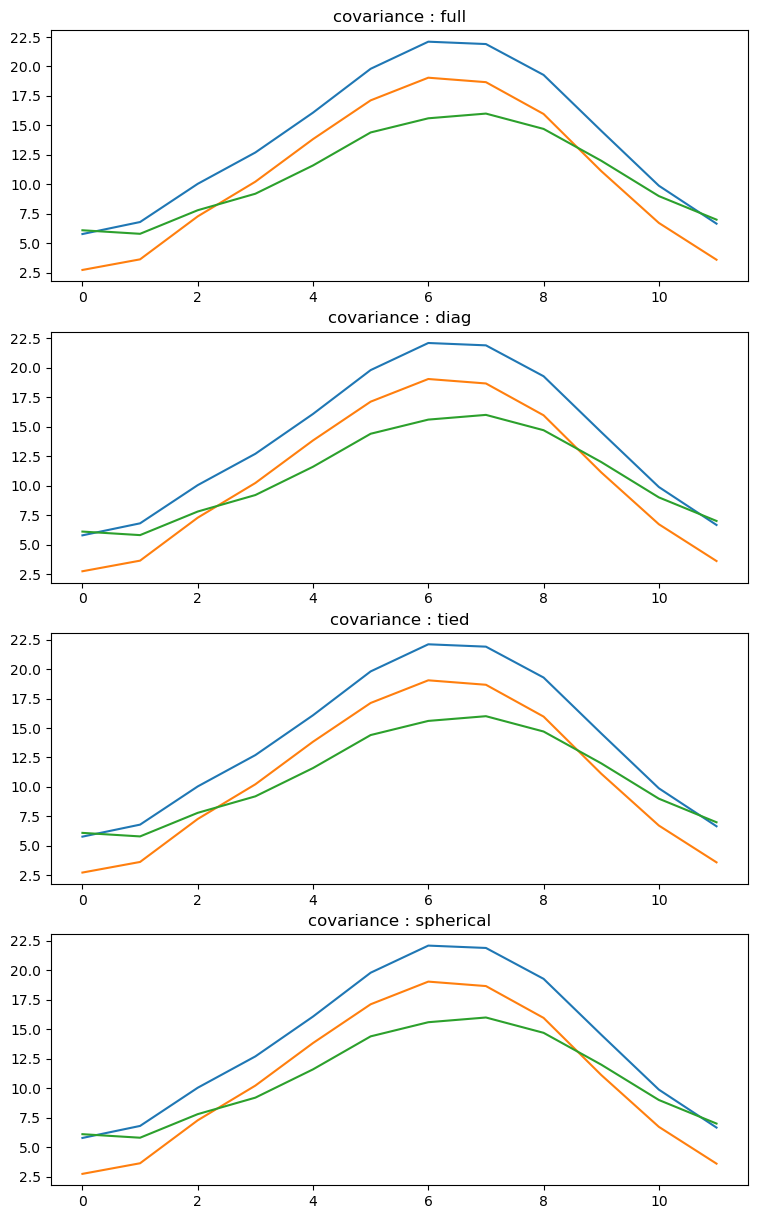

In [81]:
# observe different covariances
covariances=['full','diag','tied','spherical']

fig, axes = plt.subplots(4, 1, figsize=(9, 15))
for ax, covariance in zip(axes,covariances):
    #print(covariance)
    temp_GMM=sklearn.mixture.GaussianMixture(n_components=3,covariance_type=covariance,random_state=30)
    temp_GMM.fit(x1)
    means=temp_GMM.means_
    for mean in means:
        ax.plot(mean)
    ax.set_title('covariance : '+covariance)


##### Question 4: 

In [82]:
#let's stick with 'diag' and components=3
temp_GMM=sklearn.mixture.GaussianMixture(n_components=3,covariance_type='diag',random_state=42)
temp_GMM.fit(x1)
means=temp_GMM.means_

#get the log prabability
log_prob_temp=temp_GMM.score_samples(x1)

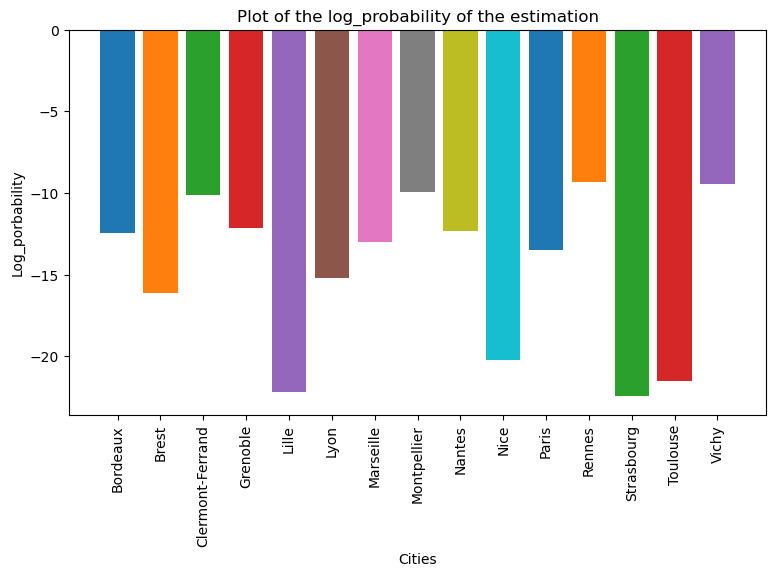

In [83]:
# Create figure and axes
fig, ax = plt.subplots(figsize=(9, 5))

# # Scatter plot with color
# scatter = ax.scatter(geo[:,1], geo[:,0], c=y,cmap=cmap, s=50)
for i in range(0,len(cities)):
    ax.bar(cities[i],log_prob_temp[i])


# Add labels and title
ax.set_title('Plot of the log_probability of the estimation')
ax.set_xlabel('Cities')
ax.set_ylabel('Log_porbability')
ax.tick_params(axis='x',labelrotation=90)

plt.show()

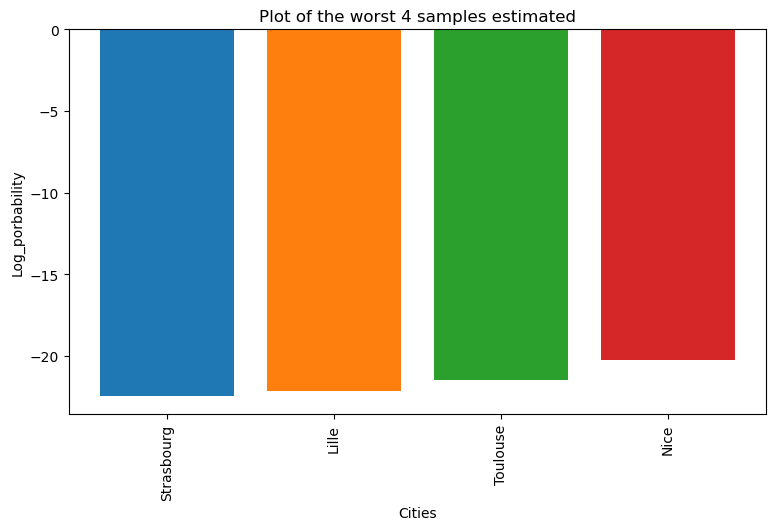

In [84]:
# Get indices of worst (least probable) samples only the 4 worst samples
outlier_idx = np.argsort(log_prob_temp)[:4]

# Create figure and axes
fig, ax = plt.subplots(figsize=(9, 5))

# # Scatter plot with color
# scatter = ax.scatter(geo[:,1], geo[:,0], c=y,cmap=cmap, s=50)
for i in outlier_idx:
    ax.bar(cities[i],log_prob_temp[i])


# Add labels and title
ax.set_title('Plot of the worst 4 samples estimated')
ax.set_xlabel('Cities')
ax.set_ylabel('Log_porbability')
ax.tick_params(axis='x',labelrotation=90)

plt.show()


*Interpreation*: 

The most obvious outlier is *Brest* this maybe the most expected city since the weather in bretagne 
stays very similar all the years with a rleatively cold summer and relatively hot winter.

On the other hand we see *strabourg* and *Lille* also slightly stand out as the temperatures in winter could get very could 
as they are in the exreme north.

Final observation is *Toulouse* which because of it's position away from sea breezes, making summers there extremly hot 
 


### 4 Dimensionality reduction

#### 4.1 Linear Projection

##### Question 1: Covariance matrix

<Axes: >

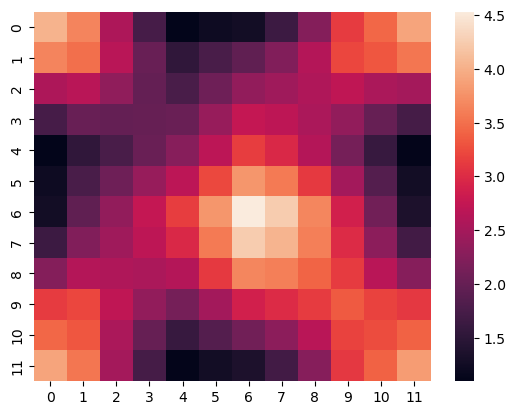

In [85]:
temp_cov_matrix=np.cov(x1.T)
sns.heatmap(temp_cov_matrix)


*Interpretation*:

It seems that high values of covariances are concentrated on the center and also 
on the four corners.

This first demonstrates a high covariance between summer months (6,7,8) specially 
between june and july. As for the corners extremeties we have winter months such 10, 11 
with 0 and 1 (of course keep in mind to add +1 to the indexes as 0 in plot equivalent to January)  


##### Question 2: Compute PCA

In [86]:
temp_pca=PCA(n_components=None)
x1_pca = temp_pca.fit(x1)
tem_pca_explained_variance=temp_pca.explained_variance_ratio_

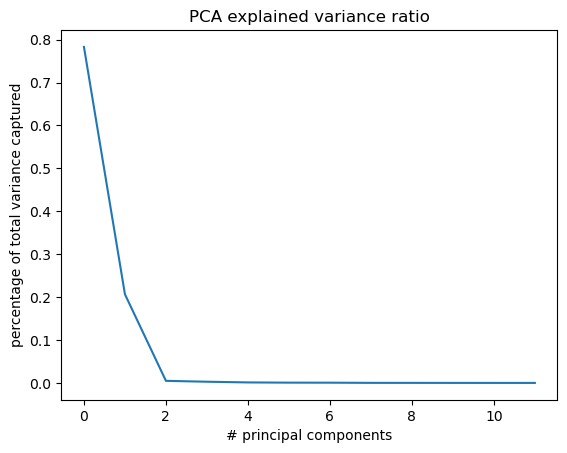

In [87]:
#Now for the plot

fig, ax = plt.subplots()

scatter = ax.plot(tem_pca_explained_variance)
ax.set_ylabel('percentage of total variance captured')
ax.set_xlabel('# principal components')

ax.set_title('PCA explained variance ratio')
plt.show()

*Interpretation*:
    Clearly with 2 pcs we capture all the variance of our data hence no need to go above 2 PCs 

##### Question 3: PCA k=2 

In [88]:
# let's project on 2 components
temp_pca=PCA(n_components=2)
temp_pca.fit(x1)
x1_pca=temp_pca.transform(x1)


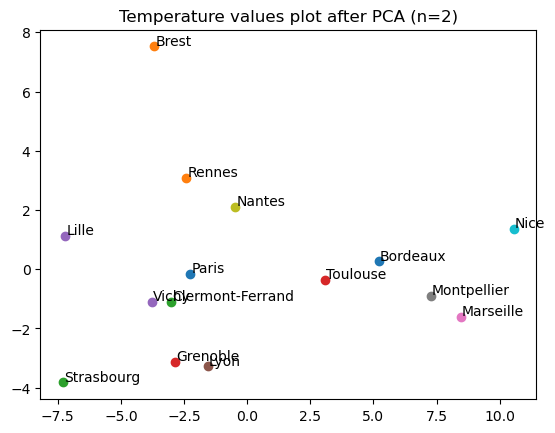

In [89]:
#Now for the plot

fig, ax = plt.subplots()

for i in range(0,len(x1_pca)):
    ax.scatter(x1_pca[i][0],x1_pca[i][1])
    ax.text(x1_pca[i][0]+0.05,x1_pca[i][1]+0.05,cities[i])


ax.set_title('Temperature values plot after PCA (n=2)')
plt.show()

*Interpretation*:
    As explained previously with 2 pcs we capture most of the variance of our data hence no need to go above 2 PCs.

    If we try to interpret what the pca axes are aiming to compare we can clearly see that along the horizontal (or the x axis),
    we tend to have hot on average cities with higher values and northern and low temperatures in winter with low values. 

    As for the Y axis it seems to measure the variance of temperatues throughout the year where Brest has the lowest variance and strasbourg the 
    highest, or even Lyon and Grenoble that have both a cold weather but a hot summer.

##### Question 4: plot of PCA's components

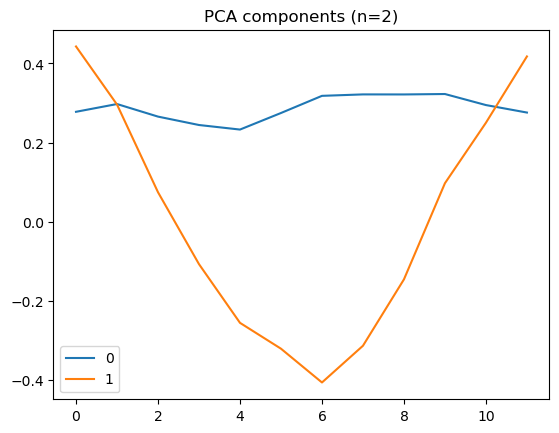

In [90]:
# Create figure and axes
fig, ax = plt.subplots()

# Scatter plot with color
for i,el in enumerate(temp_pca.components_):
    ax.plot(el,label=i)
    
ax.legend()
ax.set_title('PCA components (n=2)')
plt.show()


*Interpretation*:

    Component 1: It seems that months that impact the most are month with extreme temperatures, either winter or summer. 
    Hence we can educted that this components translates to the avg. temperatures throughout the year. this goes hand in hand with the previous interpretation. 
    
    Component 0: Focus on the evolution of the temeprature as we can see the picks before and adfter summer, it might be an allusion to the variance of temperature 

##### Question 5: Reconstruction of data 

- As proven before p=2 captures most of the variance so first let's plot the full reconstructed data (using p=2) and for the second plot keep the pca on p=2 but only use one component for the reconstruction. 

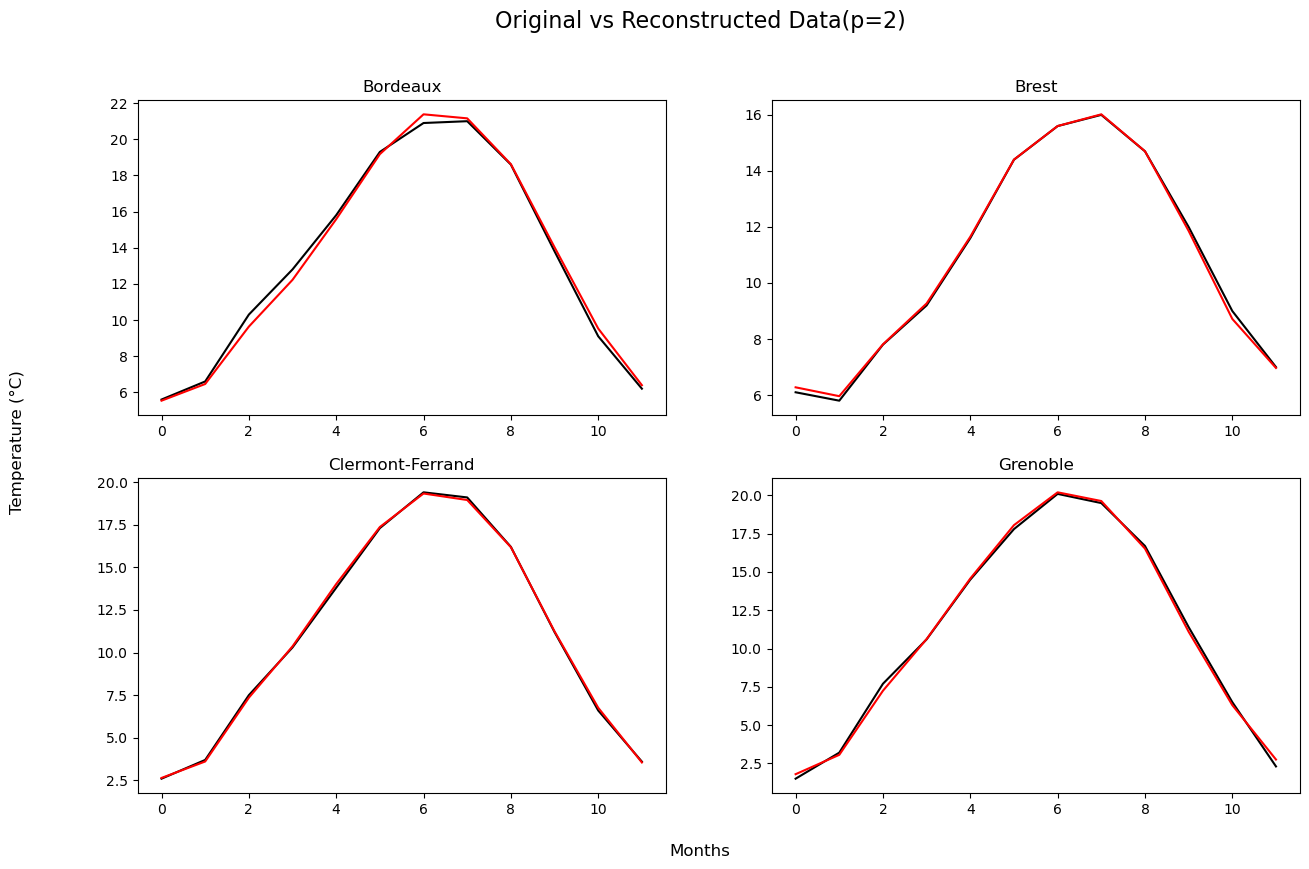

In [91]:
p=2
#do PCa with no imposed components
temp_pca=PCA(n_components=p)
temp_pca.fit(x1)
x1_pca=temp_pca.transform(x1)
x_inverse=temp_pca.inverse_transform(x1_pca)
# Create figure and axes
fig, axes = plt.subplots(2,4//2,figsize=(15, 9))

# # Scatter plot with color
# scatter = ax.scatter(geo[:,1], geo[:,0], c=y,cmap=cmap, s=50)
index=0
for i in range(0,4):
    if(i ==2 ):
        index+=1
    axes[index,i%2].plot(x1[i],color='black',label='original')
    axes[index,i%2].plot(x_inverse[i],color='red',label='reconstructed')
    axes[index,i%2].set_title(cities[i])


fig.suptitle(f'Original vs Reconstructed Data(p={p})', fontsize=16)
fig.text(0.5, 0.04, 'Months', ha='center', fontsize=12)        # x-axis label
fig.text(0.04, 0.5, 'Temperature (°C)', va='center', rotation='vertical', fontsize=12)  # y-axis label

plt.show()



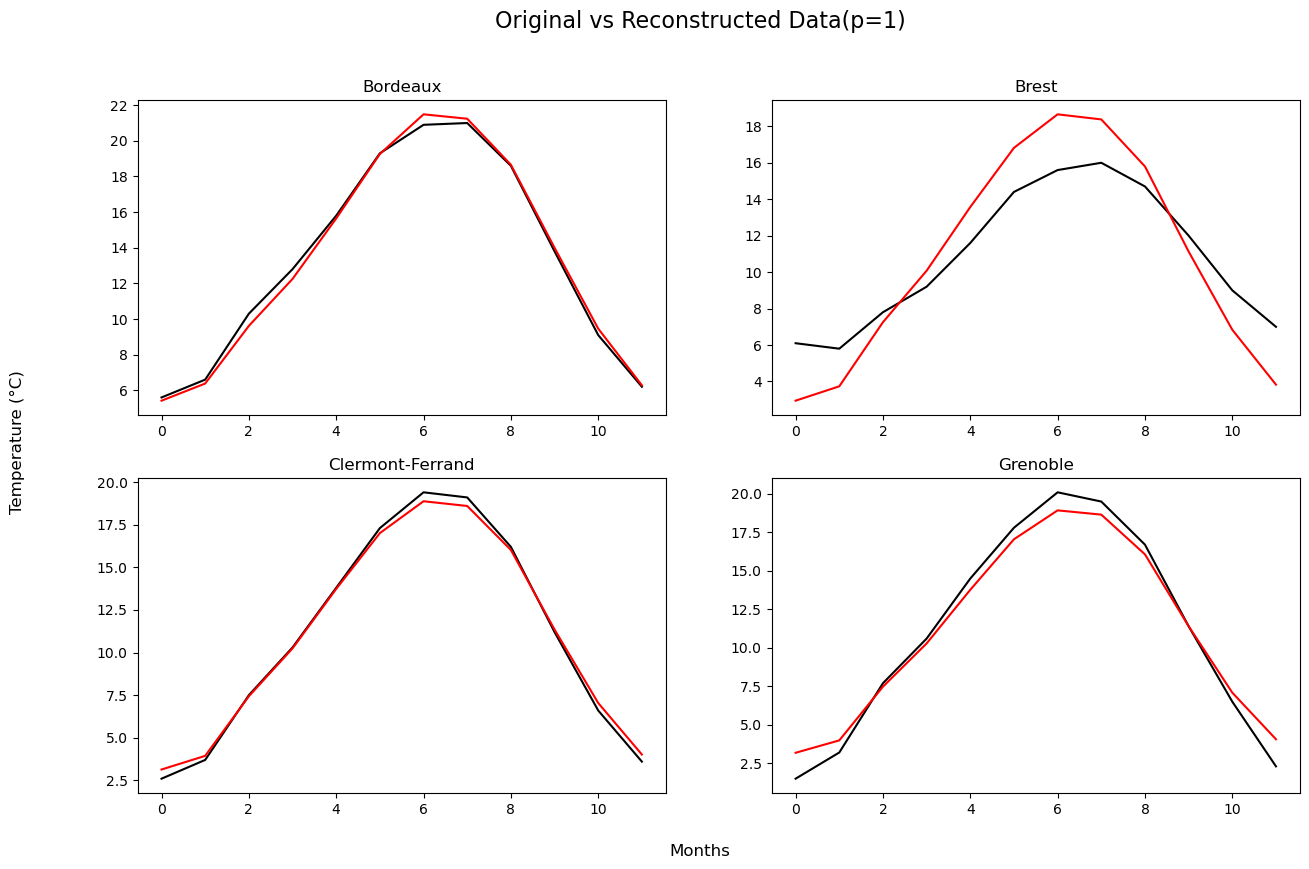

In [92]:
#let p=4
p=1
#do PCa with no imposed components
temp_pca=PCA(n_components=p)
temp_pca.fit(x1)
x1_pca=temp_pca.transform(x1)
x_inverse=temp_pca.inverse_transform(x1_pca)
# Create figure and axes
fig, axes = plt.subplots(2,4//2,figsize=(15, 9))

# # Scatter plot with color
# scatter = ax.scatter(geo[:,1], geo[:,0], c=y,cmap=cmap, s=50)
index=0
for i in range(0,4):
    if(i ==2 ):
        index+=1
    axes[index,i%2].plot(x1[i],color='black',label='original')
    axes[index,i%2].plot(x_inverse[i],color='red',label='reconstructed')
    axes[index,i%2].set_title(cities[i])


fig.suptitle('Original vs Reconstructed Data(p=1)', fontsize=16)
fig.text(0.5, 0.04, 'Months', ha='center', fontsize=12)        # x-axis label
fig.text(0.04, 0.5, 'Temperature (°C)', va='center', rotation='vertical', fontsize=12)  # y-axis label

plt.show()




*Interpretation*:

as we have seen the previously with 2 components we capture most of the variation hence between p=4
and p=2 there's no big difference. Altough from p=1 and p=2 the explained variance ratio changesa lot
and that explaines how p=1 doesn't have a good reconstruction

by having two componnents the most obvious way to interpret this with a guassian for north (lower temp) and south gaussian (higher temp) 


#### 4.2 Manifold Learning : TSNE

##### Question 1: Compute TSNE

In [94]:
x1_TSNE=sklearn.manifold.TSNE(n_components=2,perplexity=3).fit_transform(x1) #perplexity by default is 30.0 but must be less then n_samples (here 15)
x1_TSNE.shape

(15, 2)

##### Question 2: Project & plot samples

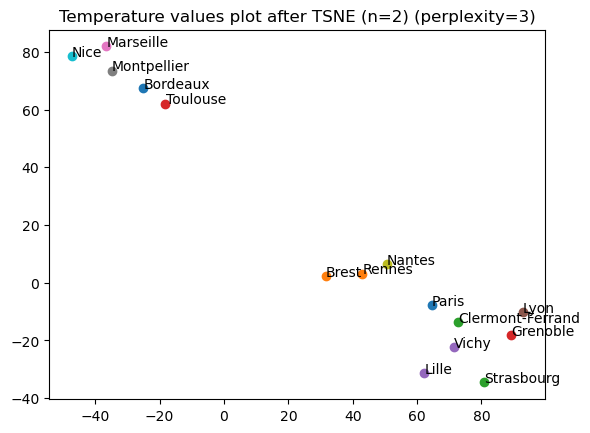

In [101]:
#Now for the plot

fig, ax = plt.subplots()

for i in range(0,len(x1_pca)):
    ax.scatter(x1_TSNE[i][0],x1_TSNE[i][1])
    ax.text(x1_TSNE[i][0]+0.05,x1_TSNE[i][1]+0.05,cities[i])


ax.set_title('Temperature values plot after TSNE (n=2) (perplexity=3)')
plt.show()

*Interpretation*:

    t-SNE seperation using 3 neighbors clearly made a big seperation between north and south. 
    And yes the t-sne seems to be able to recover the geographical positions where we see logical clusters like (Brest, Nantes, Rennes) or even (Lyon, Grenoble, Clerment-ferrand)

##### Question 3: Check the influency of perplexity 

In [105]:
x1_TSNE=sklearn.manifold.TSNE(n_components=2,perplexity=1).fit_transform(x1) #perplexity by default is 30.0 but must be less then n_samples (here 15)
x1_TSNE.shape

(15, 2)

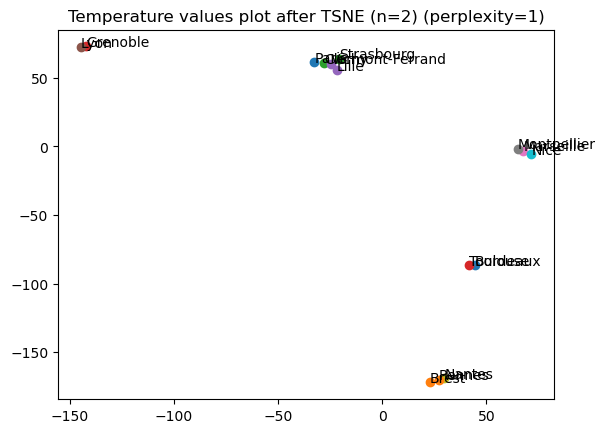

In [106]:
#Now for the plot

fig, ax = plt.subplots()

for i in range(0,len(x1_pca)):
    ax.scatter(x1_TSNE[i][0],x1_TSNE[i][1])
    ax.text(x1_TSNE[i][0]+0.05,x1_TSNE[i][1]+0.05,cities[i])


ax.set_title('Temperature values plot after TSNE (n=2) (perplexity=1)')
plt.show()

In [107]:
x1_TSNE=sklearn.manifold.TSNE(n_components=2,perplexity=6).fit_transform(x1) #perplexity by default is 30.0 but must be less then n_samples (here 15)
x1_TSNE.shape

(15, 2)

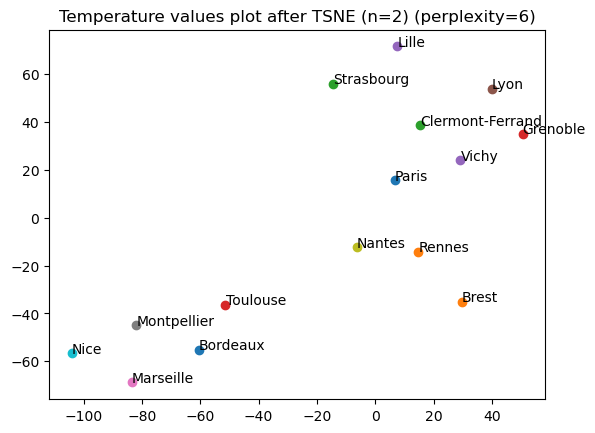

In [108]:
#Now for the plot

fig, ax = plt.subplots()

for i in range(0,len(x1_pca)):
    ax.scatter(x1_TSNE[i][0],x1_TSNE[i][1])
    ax.text(x1_TSNE[i][0]+0.05,x1_TSNE[i][1]+0.05,cities[i])


ax.set_title('Temperature values plot after TSNE (n=2) (perplexity=6)')
plt.show()

*Remark*:
    Perplexity influences on the number of neighbors and hence how our clustering is considered. 
    with a perplexity=1 it was itneressting to see that grenoble and Lyon had their own cluster and weren't considered in the cluste of Paris  

## Digits Dataset

### 1 Loading Data

#### Question 1: Load Data

In [5]:
digits_dataset=np.load('digits.npz')
digits_dataset.files


['xt', 'yt', 'y', 'x']

In [6]:
digi_x=digits_dataset.get('x')
digi_xt=digits_dataset.get('xt')
digi_y=digits_dataset.get('y')
digi_yt=x=digits_dataset.get('yt')

print('x: ',digi_x.shape)
print('xt: ',digi_xt.shape)
print('y: ',digi_y.shape)
print('yt: ',digi_yt.shape)

x:  (3000, 784)
xt:  (1500, 784)
y:  (3000, 1)
yt:  (1500, 1)


In [7]:
x2=np.concatenate([digi_x, digi_xt], axis=0)
print('x2:',x2.shape)
#normalize
x2=x2.astype(np.float32)/255.0

y2=np.concatenate([digi_y, digi_yt], axis=0)
print('y2:',y2.shape)
#no need to normalize the classes values

x2: (4500, 784)
y2: (4500, 1)


#### Question 2: Show the mean images 

(784,)
(28, 28)


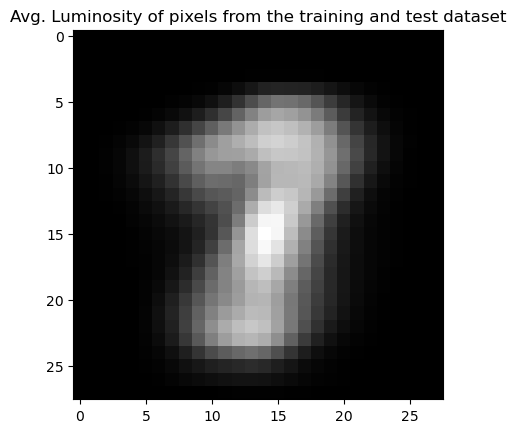

In [8]:
digit_mean=np.mean(x2,axis=0)
print(digit_mean.shape)

img_mean=digit_mean.reshape(28,28)
print(img_mean.shape)
plt.imshow(img_mean,cmap="gray")
plt.title('Avg. Luminosity of pixels from the training and test dataset')
plt.show()

### 2 Custering

#### 2.1 For both Datasets

##### Question 1: Kmeans K=3

In [9]:
#apply Kmeans clustering for digits k=3
kmeans=KMeans(n_clusters=3,random_state=42)
kmeans.fit(x2)
labels=kmeans.labels_
centroids=kmeans.cluster_centers_

##### Question 2: plot of centroids

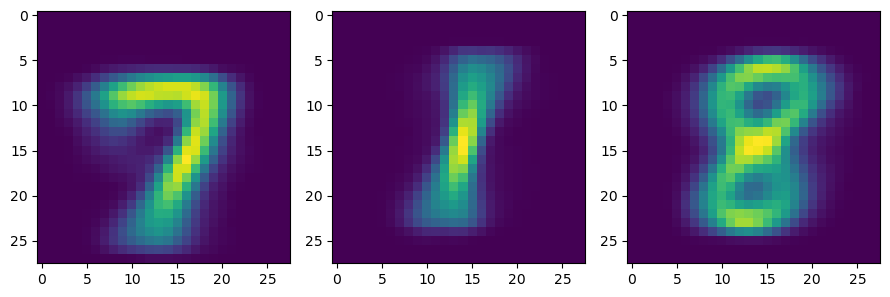

In [11]:
images=[]
for el in centroids:
    images.append(el.reshape(28,28))
    
fig, axes = plt.subplots(1, 3, figsize=(9, 3))
for ax, img in zip(axes,images):
    ax.imshow(img)
    
plt.tight_layout()
plt.show()



*Interpretation*:
    Images are not very clear but we can observe a 7,1,8 which corresponds to our classes. 
     


##### Question 3: plot of centroids for Kmeans with different K=4

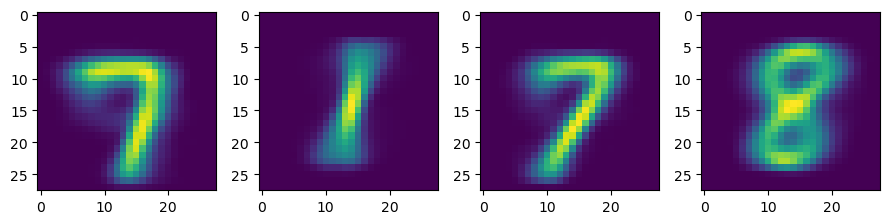

In [15]:
#apply Kmeans clustering for digits k=4
kmeans_4=KMeans(n_clusters=4,random_state=42)
kmeans_4.fit(x2)
labels_4=kmeans_4.labels_
centroids_4=kmeans_4.cluster_centers_

#plot centroids
images=[]
for el in centroids_4:
    images.append(el.reshape(28,28))
    
fig, axes = plt.subplots(1, len(images), figsize=(9, 3))
for ax, img in zip(axes,images):
    ax.imshow(img)
    
plt.tight_layout()
plt.show()

*Interpretation*:
    With K=4 (above the number of out true classes), we end up with a cluster redundency. Here two clusters look to the human similar


#### 2.3 Digits Datasets

##### Question 1: could you tell if a cluster centroid is a true image ? 
    No since it's the average of images coming from our dataset (because of how kmeans works)
    so it's a generated blurry image

##### Question 2: Plot predicted labels as signal

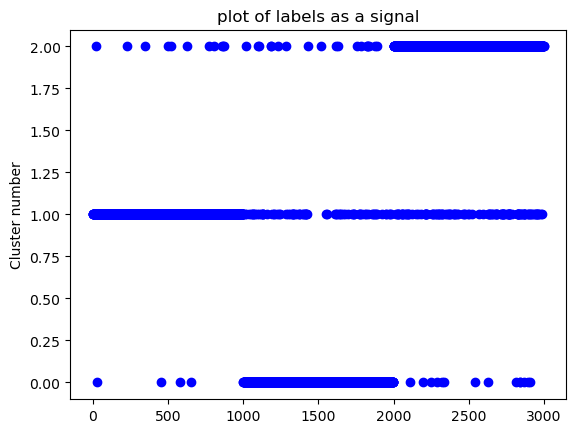

In [ ]:
#plot the predicted labels as signal 
#let's consider only labels from the training x as it follows a certain order
signal_labels=labels[:-len(digi_xt)]
x_signal=np.arange(len(signal_labels))

# plot
fig, ax = plt.subplots()
ax.scatter(x_signal, signal_labels ,linestyle='-', color='blue')
plt.title('plot of labels as a signal: K=3')
plt.ylabel('Cluster number')

plt.show()

*Interpretation*:

- First it's important to remmember that our data set has a class of 1 for indexes in [0,1000], 7 in [1000,2000] and 8 in [2000,3000]
si in our plot we can observe:  
    for cluster 0 it's more around [1000-2000] represents 7 
    for cluster 2 it is around [2000-3000] represents 8
    for cluster 1 which represents the class '1' it doesn't seem to be respecting the order (it doesn't lay mainly within the range of indices [0,1000]).
    This mainly because the number 1 in writing is a composition of 7 and 8 so a badly written 7 or 8 are easily interpeted as 1 but on the other hand a badly written 1 can be hardly assigned to 7 or 8. 

##### Question 3: Quality of clustering (K=3)

- Check the quality of the clustering on K=3

In [16]:
from sklearn.metrics import rand_score, adjusted_rand_score
#Kmeans for K=3
#for this we used the training and test data 
y_true=y2.ravel()
y_pred=labels.ravel()
ri = rand_score(y_true, y_pred)
print("Rand Index:", ri)


ari = adjusted_rand_score(y_true, y_pred)
print("Adjusted Rand Index:", ari)



Rand Index: 0.8876126546639994
Adjusted Rand Index: 0.7481880864638025


##### Question 4: check the effect of the K value on the clustering score

K=2

In [17]:
#apply Kmeans clustering for digits k=2
kmeans=KMeans(n_clusters=2,random_state=42)
kmeans.fit(x2)
labels=kmeans.labels_
centroids=kmeans.cluster_centers_

#for this we used the training and test data 
y_true=y2.ravel()
y_pred=labels.ravel()
ri = rand_score(y_true, y_pred)
print("Rand Index:", ri)
ari = adjusted_rand_score(y_true, y_pred)
print("Adjusted Rand Index:", ari)

Rand Index: 0.685129436171001
Adjusted Rand Index: 0.3988442714842137


K=4

In [18]:
#apply Kmeans clustering for digits k=4
kmeans=KMeans(n_clusters=5,random_state=42)
kmeans.fit(x2)
labels=kmeans.labels_
centroids=kmeans.cluster_centers_

#for this we used the training and test data 
y_true=y2.ravel()
y_pred=labels.ravel()
ri = rand_score(y_true, y_pred)
print("Rand Index:", ri)
ari = adjusted_rand_score(y_true, y_pred)
print("Adjusted Rand Index:", ari)

Rand Index: 0.8271510212145909
Adjusted Rand Index: 0.5726374799710744


*Interpretation:*

- Both increasing and decrasing negatively affect the performance and score of our model. This is mainly due to the fact that our data by definition only includes three classes (1,7,8). Using this affirmation can help us identify that the best k is 3.

- Let's finally plot an elbow plot in order to determine the best K for our dataset

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

#Elbow method to find the optimal k

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42).fit(x2)
    
    distortions.append(sum(np.min(cdist(x2, kmeanModel.cluster_centers_, 'euclidean'), axis=1)**2) / x2.shape[0])
    
    inertias.append(kmeanModel.inertia_)
    
    mapping1[k] = distortions[-1]
    mapping2[k] = inertias[-1]

Distortion values:
1 : 43.01885673222738
2 : 38.45075533963005
3 : 34.623605797416204
4 : 33.28629894002
5 : 31.13401066321285
6 : 30.301208726721164
7 : 28.95139906094761
8 : 28.56283765020955
9 : 27.825563458325774


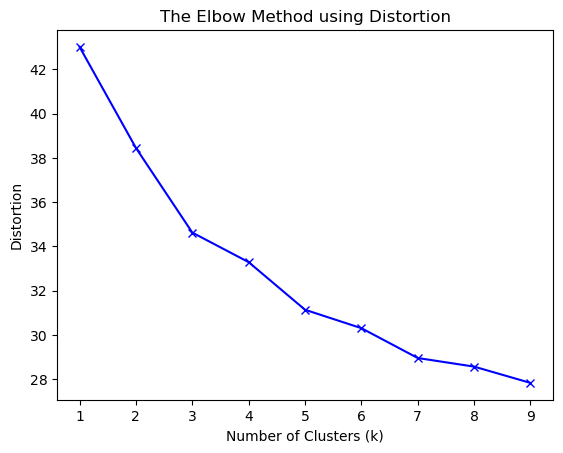

In [ ]:
print("Distortion values:")
for key, val in mapping1.items():
    print(f'{key} : {val}')

plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

Inertia values:
1 : 193584.796875
2 : 173028.4375
3 : 155806.296875
4 : 149788.359375
5 : 140103.0625
6 : 136355.421875
7 : 130281.28125
8 : 128532.71875
9 : 125215.0


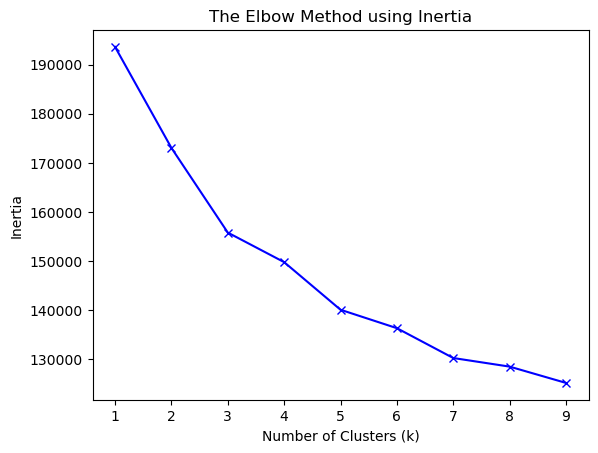

In [ ]:
print("Inertia values:")
for key, val in mapping2.items():
    print(f'{key} : {val}')

plt.plot(K, inertias, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

*Interpretation*: 
    In the elbow shows that the more clusters we add the better the perfromance would be without a clear visual elbow. Altough , we can see that the steepest negative slop in the plot is optained 


### 3 Density Estimation


#### 3.1 For Both datasets

##### Question 1: Estimate GMM density

K=3

In [ ]:
# k=3
temp_GMM=sklearn.mixture.GaussianMixture(n_components=3,covariance_type='diag',random_state=42)
temp_GMM.fit(x2)
gaussian_centers=temp_GMM.means_

##### Question 2: Plot of the Gaussians centers

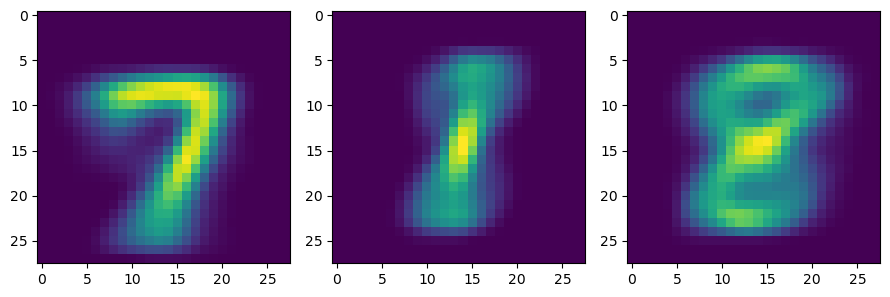

In [ ]:
fig, axes = plt.subplots(1, gaussian_centers.shape[0], figsize=(9, 3))
for ax, img in zip(axes,gaussian_centers):
    ax.imshow(img.reshape(28,28))
    
plt.tight_layout()
plt.show()



*Interpretation*: 

    we can clearly observe a 7 and an 8 but the image representing the cluster of '1'
    seems to be distorted with it looking like 8, 7, or even a 1. this is mainly bcause 
    the shape of 1 is a major component in the shape of number 7. As for 8 it's composed of 
    of a slightly tilted 1. Hence we can justify the non-clarity the centroids representing 1.


##### Question 3: change the value of K 

K=5

In [ ]:
temp_GMM=sklearn.mixture.GaussianMixture(n_components=5,covariance_type='diag',random_state=42)
temp_GMM.fit(x2)
gaussian_centers=temp_GMM.means_

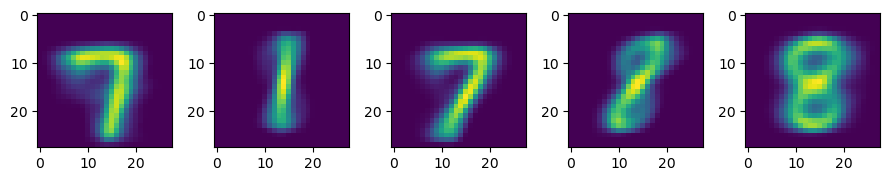

In [ ]:
fig, axes = plt.subplots(1, gaussian_centers.shape[0], figsize=(9, 3))
for ax, img in zip(axes,gaussian_centers):
    ax.imshow(img.reshape(28,28))
    
plt.tight_layout()
plt.show()




*Interpretation*:

    we Observe a new 7 and 8 clusters which aleviated the bluriness on the 1 cluster that became
    clearer. Although because of the nature of our classification and the fact that we have 
    3 classes, the best value for K reamins 3, because of the redundancy of clusters.


- Multiple covarainces

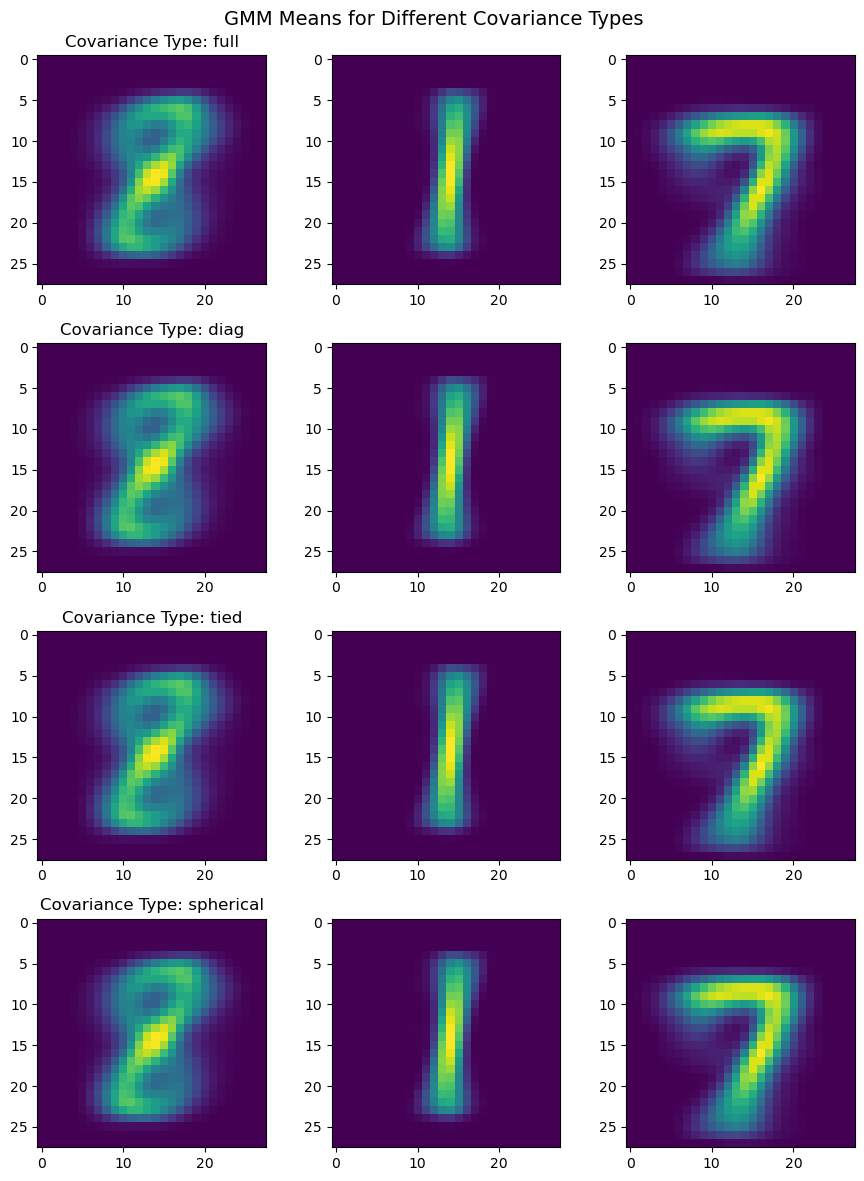

In [ ]:
# observe different covariances for components=3
covariances=['full','diag','tied','spherical']
covariances_gaussian_centers=[]

fig, axes = plt.subplots(len(covariances), 3, figsize=(9, 12))  # 4 rows (cov types), 3 columns (components)

for row, el in enumerate(covariances):
    temp_GMM=sklearn.mixture.GaussianMixture(n_components=3,covariance_type=covariance,random_state=30)
    temp_GMM.fit(x2)
    means=temp_GMM.means_

    for col, mean in enumerate(means):
        ax=axes[row,col]
        ax.imshow(mean.reshape(28,28))
        if col==0:
            ax.set_title(f"Covariance Type: {el}")

plt.suptitle("GMM Means for Different Covariance Types", fontsize=14)
plt.tight_layout()
plt.show()

##### Question 4: Compute the log probability

Log probability

In [20]:
#let's stick with 'diag' and components=3
digits_GMM=sklearn.mixture.GaussianMixture(n_components=3,covariance_type='diag',random_state=30)
digits_GMM.fit(x2)
means=digits_GMM.means_
log_prob_digits=digits_GMM.score_samples(x2)
# Get indices of worst (least probable) samples only the 4 worst samples
outlier_idx = np.argsort(log_prob_digits)[:30]


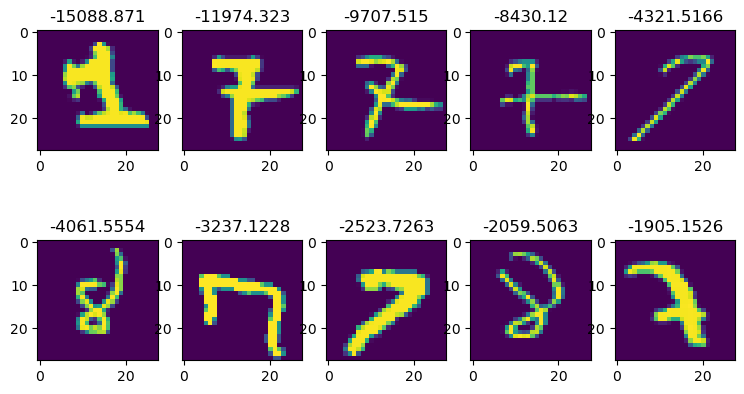

In [ ]:
# Create figure and axes
fig, axes = plt.subplots(2,5,figsize=(9, 5))


for ax,i in zip(axes[0],outlier_idx[:5]):
    ax.imshow(x2[i].reshape(28,28))
    ax.set_title(str(log_prob_digits[i]))

for ax,i in zip(axes[1],outlier_idx[5:]):
    ax.imshow(x2[i].reshape(28,28))
    ax.set_title(str(log_prob_digits[i]))


plt.show()




*Interpretation*:

    - It's very interessting that alot of 7 with a central tick is one of the outliers this means our model 
    isn't very good at predicting thes shapes.
    - Same observation for the 8 when the upper circl isn't properly closed dow. 
    - The fact that we don't have a a lot of 1 might due to the 1 either being considered as a 7 with high probability.

##### Question 5

Predict the values

- Predcit the values with GMM
    - recall the score of the Kmeans (K=3)
        - Rand Index: 0.8876126546639994
        - Adjusted Rand Index: 0.7481880864638025

In [ ]:
y_pred=digits_GMM.predict(x2)
y_true=y2.ravel()
ri = rand_score(y_true, y_pred)
print("Rand Index:", ri)
ari = adjusted_rand_score(y_true, y_pred)
print("Adjusted Rand Index:", ari)

Rand Index: 0.7447232224444938
Adjusted Rand Index: 0.4454052846519002


*Interpretation*:

    In Rand Index the values are close, hence we can say both models are very close in
    determining the right clusters.

    On the other hand we observe a great disparity in the ARI where Kmeans is around =0,74 
    and GMM trails behind at 0,44. This observation tells ous that our GMM acutally isn't a 
    vey good model as most of the good prediction that helped him attain a good RI where by chance 
    (a lots of points who where faslely predicted but had a good score on difference).
    
    So not it's not better then KMEANS

### 4 Dimensionality reduction

#### 4.1 Linear Projection

##### Question 1: Covariance matrix

<Axes: >

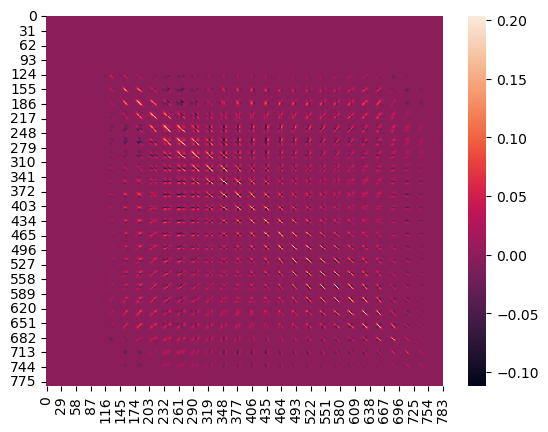

In [ ]:
digit_cov_matrix=np.cov(x2.T)
sns.heatmap(digit_cov_matrix)

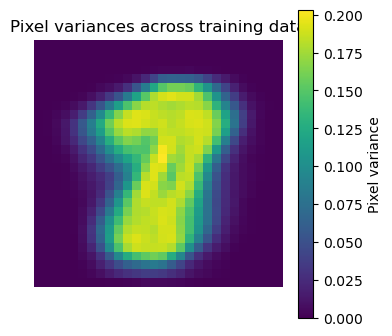

In [28]:

# Compute per-pixel variance across the training set
pixel_variances = np.var(x2, axis=0)

# Detect image size (8x8 for sklearn digits, 28x28 for MNIST)
img_size = int(np.sqrt(x2.shape[1]))
variance_image = pixel_variances.reshape((img_size, img_size))

# Plot the variance heatmap
plt.figure(figsize=(4,4))
plt.imshow(variance_image)
plt.colorbar(label="Pixel variance")
plt.title("Pixel variances across training data")
plt.axis("off")
plt.show()


*Interpretation*:
    First we can see that there's frame in the matrix as if  pixels on the extreme aren't correlated so this 
    is pretty much logicall as our number tend to be centred. 
    We tried reshaping the covariance into an image as it simplifies the visualization. For this we can clear observe back our 3 classes. 
    Fruthermore the square on the top left is observed and can look like a round shape giving more the shape of 8. 
    
  

##### Question 2: PCA

In [31]:
digit_pca=PCA(n_components=None)
x2_2D = digit_pca.fit_transform(x2)

In [39]:
digit_pca.explained_variance_.shape

(784,)

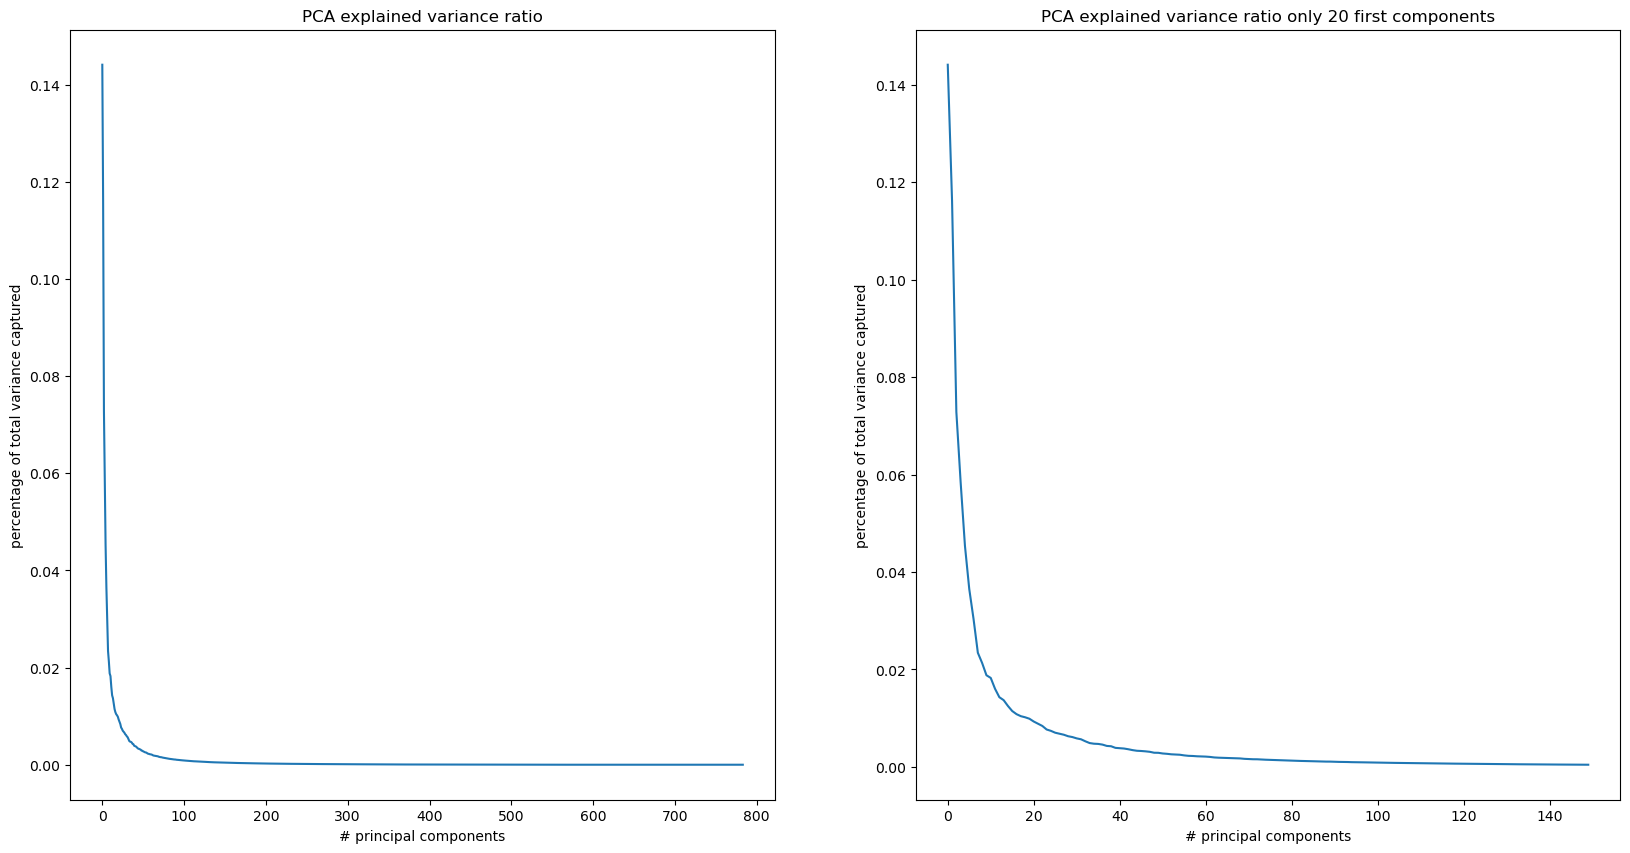

In [43]:
#Now for the plot

# Create figure and axes
fig, ax = plt.subplots(1,2,figsize=(20,10))

# Scatter plot with color
ax[0].plot(digit_pca.explained_variance_ratio_)
ax[0].set_ylabel('percentage of total variance captured')
ax[0].set_xlabel('# principal components')

ax[1].plot(digit_pca.explained_variance_ratio_[:150])
ax[1].set_ylabel('percentage of total variance captured')
ax[1].set_xlabel('# principal components')

ax[0].set_title('PCA explained variance ratio')
ax[1].set_title('PCA explained variance ratio only 20 first components')

plt.show()

*Interpretation*:

    Clearly with almost 70 or 80 pcs we capture the most of the values.
    if we use p=2 ther's a considerable reduction but this is still very fare from expected

##### Question 3: project with PCA

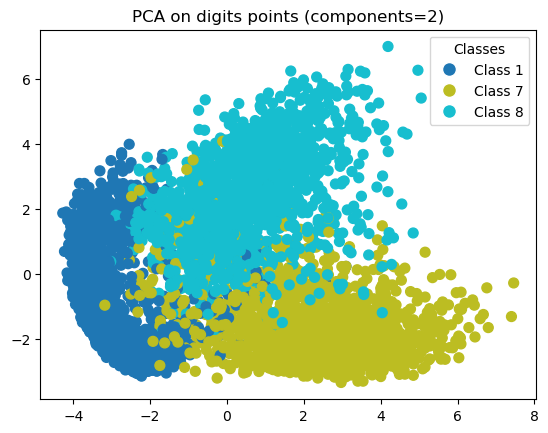

In [ ]:

digit_pca=PCA(n_components=2)
x2_2D = digit_pca.fit_transform(x2)

# Create figure and axes
fig, ax = plt.subplots()

# Scatter plot with color
scatter = ax.scatter(x2_2D[:,0], x2_2D[:,1], c=y2,cmap='tab10', s=50)


#visualize labels for classes
unique_labels = np.unique(y2)
colors = [scatter.cmap(scatter.norm(label)) for label in unique_labels]


# Create legend handles
legend_elements = [Line2D([0], [0], marker='o', color='w',
                          markerfacecolor=color, markersize=10,
                          label=f'Class {label}')
                   for color, label in zip(colors, unique_labels)]

# Add legend
plt.legend(handles=legend_elements, title='Classes')

# Add labels and title
ax.set_title('PCA on digits points (components=2)')


plt.show()


*Interpretation*
    
    This a very tricky plot to analyse but we can see that ther's a vertical seperation between class 1 on one side and the two classes 7 and 8 on the other side. This could indicate that the our first component (X_axis) detects the presence of horizental lines where in 7 and 8 we find some on 1 there's no horizental line.

##### Question 4: plot the two first principal directions 

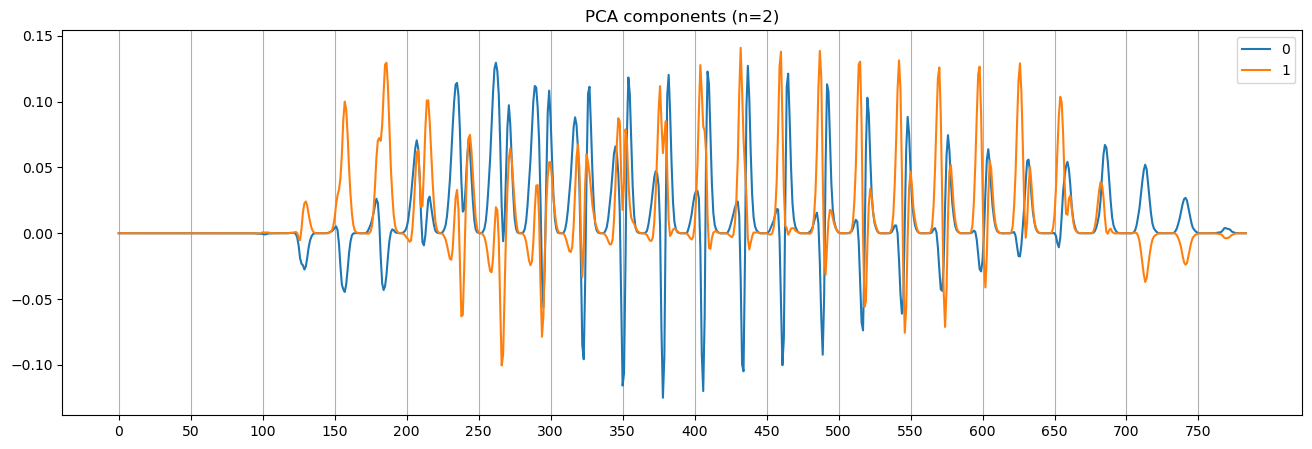

In [50]:
# Create figure and axes
fig, ax = plt.subplots(figsize=(16,5))
# Scatter plot with color
for i,el in enumerate(digit_pca.components_):
    ax.plot(el,label=i)
    
ax.set_xticks(np.arange(0, len(digit_pca.components_[0]), 50))
ax.grid(True,axis='x')
ax.legend()
ax.set_title('PCA components (n=2)')
plt.show()


*Interpretation*:
    If we focus on pixels from [350-550] which if converted into an image of 28*28 would roughly represent the bottom half of the center of the image. In these pixels we can see that our two components have oppsite value or behviours. And consider our classes we determine that one components try to identify horizental lines (8) and the other vertical lines (1, 7).



##### Question 5: data reconstuction

p=15

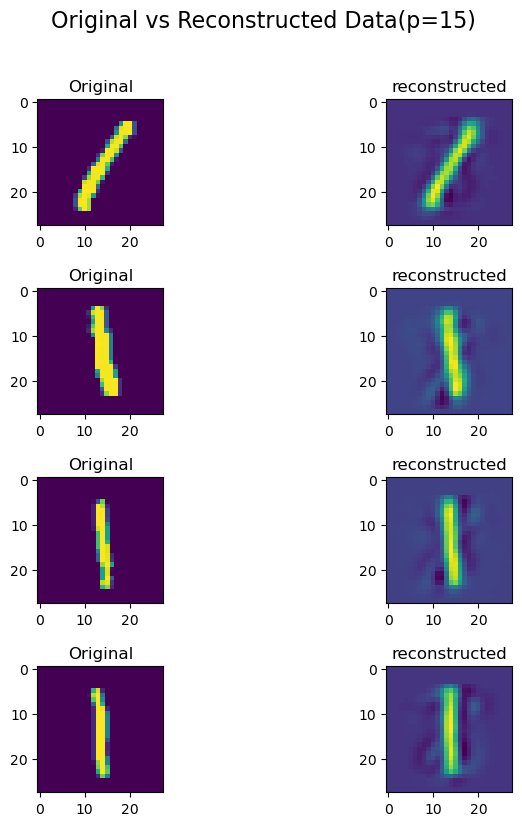

In [51]:
p=15
#do PCa with no imposed components
temp_pca=PCA(n_components=p)
temp_pca.fit(x2)
x2_pca=temp_pca.transform(x2)
x_inverse=temp_pca.inverse_transform(x2_pca)
# Create figure and axes
fig, axes = plt.subplots(4,2,figsize=(9, 9))
plt.subplots_adjust(hspace=0.5, wspace=0) 

# # Scatter plot with color
# scatter = ax.scatter(geo[:,1], geo[:,0], c=y,cmap=cmap, s=50)
index=0
for i in range(0,4):
    axes[i,0].imshow(x2[i].reshape(28,28))
    axes[i,0].set_title('Original')
    axes[i,1].imshow(x_inverse[i].reshape(28,28))
    axes[i,1].set_title('reconstructed')



fig.suptitle(f'Original vs Reconstructed Data(p={p})', fontsize=16)

plt.show()




p=100

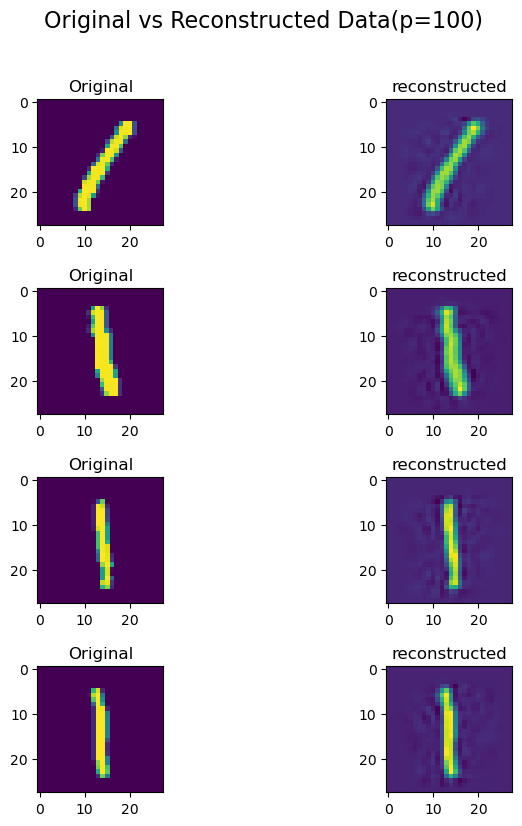

In [54]:
p=100
#do PCa with no imposed components
temp_pca=PCA(n_components=p)
temp_pca.fit(x2)
x2_pca=temp_pca.transform(x2)
x_inverse=temp_pca.inverse_transform(x2_pca)
# Create figure and axes
fig, axes = plt.subplots(4,2,figsize=(9, 9))
plt.subplots_adjust(hspace=0.5, wspace=0) 

# # Scatter plot with color
# scatter = ax.scatter(geo[:,1], geo[:,0], c=y,cmap=cmap, s=50)
index=0
for i in range(0,4):
    axes[i,0].imshow(x2[i].reshape(28,28))
    axes[i,0].set_title('Original')
    axes[i,1].imshow(x_inverse[i].reshape(28,28))
    axes[i,1].set_title('reconstructed')



fig.suptitle(f'Original vs Reconstructed Data(p={p})', fontsize=16)

plt.show()




*Interperation*:
    Clearly working with p=100 is better then p=15 but the samples in both are recognisable to the human eye, although with p=100 the reconstructed images are less blurry and better.

#### 4.2 Manifold Learning : TSNE

##### Question 1: Compute TSNE

In [ ]:
x2_TSNE=sklearn.manifold.TSNE(n_components=2).fit_transform(x2) #perplexity by default is 30.0
x2_TSNE.shape

(4500, 2)

##### Question 2: Project & plot samples

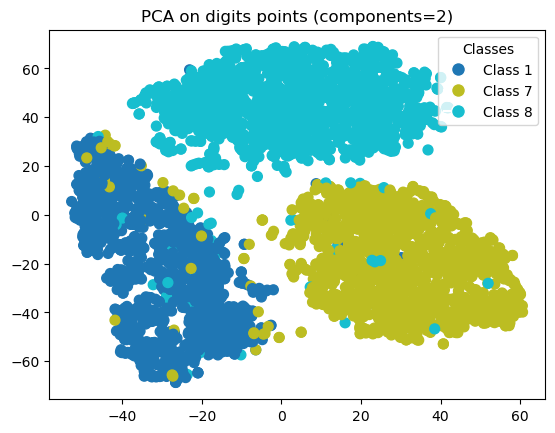

In [ ]:
# Create figure and axes
fig, ax = plt.subplots()

# Scatter plot with color
scatter = ax.scatter(x2_TSNE[:,0], x2_TSNE[:,1], c=y2,cmap='tab10', s=50)


#visualize labels for classes
unique_labels = np.unique(y2)
colors = [scatter.cmap(scatter.norm(label)) for label in unique_labels]


# Create legend handles
legend_elements = [Line2D([0], [0], marker='o', color='w',
                          markerfacecolor=color, markersize=10,
                          label=f'Class {label}')
                   for color, label in zip(colors, unique_labels)]
# Add legend
plt.legend(handles=legend_elements, title='Classes')
# Add labels and title
ax.set_title('PCA on digits points (components=2)')
plt.show()


*Interpretation*:

    t-SNE was able to reveal that our clusters are separable in high-dimensional space, this wans't visible with PCA. 
    Probably this is due to the fact that our cluster are tights hence the fact that t-sne preserves local similarities and enhaces differences making the clusters visually seperated

##### Question 3: Check the influency of perplexity 

In [97]:
x2_TSNE=sklearn.manifold.TSNE(n_components=2,perplexity=10.0).fit_transform(x2) #perplexity by default is 30.0
x2_TSNE.shape

(4500, 2)

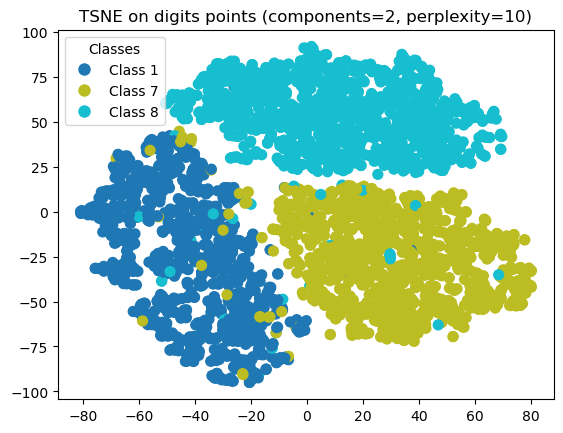

In [98]:
# Create figure and axes
fig, ax = plt.subplots()

# Scatter plot with color
scatter = ax.scatter(x2_TSNE[:,0], x2_TSNE[:,1], c=y2,cmap='tab10', s=50)


#visualize labels for classes
unique_labels = np.unique(y2)
colors = [scatter.cmap(scatter.norm(label)) for label in unique_labels]


# Create legend handles
legend_elements = [Line2D([0], [0], marker='o', color='w',
                          markerfacecolor=color, markersize=10,
                          label=f'Class {label}')
                   for color, label in zip(colors, unique_labels)]
# Add legend
plt.legend(handles=legend_elements, title='Classes')
# Add labels and title
ax.set_title('TSNE on digits points (components=2, perplexity=10)')
plt.show()


In [99]:
x2_TSNE=sklearn.manifold.TSNE(n_components=2,perplexity=40.0).fit_transform(x2) #perplexity by default is 30.0
x2_TSNE.shape

(4500, 2)

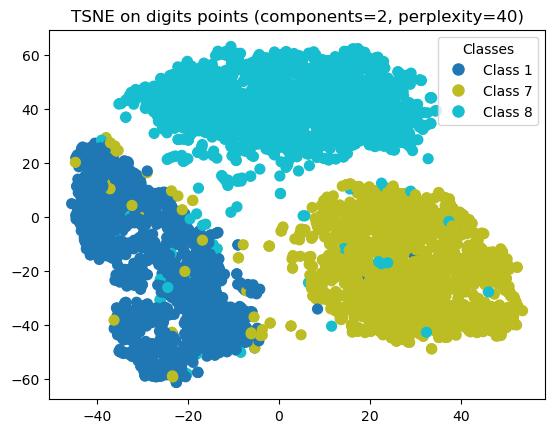

In [100]:
# Create figure and axes
fig, ax = plt.subplots()

# Scatter plot with color
scatter = ax.scatter(x2_TSNE[:,0], x2_TSNE[:,1], c=y2,cmap='tab10', s=50)


#visualize labels for classes
unique_labels = np.unique(y2)
colors = [scatter.cmap(scatter.norm(label)) for label in unique_labels]


# Create legend handles
legend_elements = [Line2D([0], [0], marker='o', color='w',
                          markerfacecolor=color, markersize=10,
                          label=f'Class {label}')
                   for color, label in zip(colors, unique_labels)]
# Add legend
plt.legend(handles=legend_elements, title='Classes')
# Add labels and title
ax.set_title('TSNE on digits points (components=2, perplexity=40)')
plt.show()


*Interpretation*:

    Perplexity acts on how the locality is considered, working on the number of neihgbhors to consider we can act the shape of the cluster. Having a low perplexity means that even our true cluster might be seperated in subclusters, on the other hand a larger perplexity make the clusters denser. 

    Answered previously, clearly TSNE was able to seperate our clusters better then PCA 